In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
train=pd.read_csv('/content/drive/MyDrive/Human Activity/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Human Activity/test.csv')

In [3]:
print(train.shape,test.shape)

(7352, 563) (2947, 563)


In [4]:
mapActivity={'STANDING':4,'SITTING':3,'LAYING':5,'WALKING':0,'WALKING_DOWNSTAIRS':2,'WALKING_UPSTAIRS':1}
train['Target']=train['Activity'].map(mapActivity)
test['Target']=test['Activity'].map(mapActivity)

In [5]:
X_train = train.drop(['subject', 'Activity','Target'], axis=1)
y_train = train['Target']

In [6]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity','Target'], axis=1)
y_test = test['Target']

In [7]:
X_train = np.expand_dims(X_train,axis = 2)
# the last column is our label

In [8]:
X_test=np.expand_dims(X_test,axis = 2)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Reshape
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
from tensorflow.keras.models import Model
#import keras
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Input,Concatenate,Dropout,Dense,BatchNormalization,Conv1D
from tensorflow.keras.layers import Input
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#from tensorflow.keras.merge import concatenate
#import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import scipy
from tensorflow.keras.initializers import he_normal,glorot_normal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler,ReduceLROnPlateau
from time import time
from tensorflow.keras.utils import plot_model

In [10]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7352, 561, 1) (7352,)
(2947, 561, 1) (2947,)


In [11]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=6)

In [12]:
y_test=tf.keras.utils.to_categorical(y_test,num_classes=6)

In [13]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
print(timesteps)
print(input_dim)

561
1


In [14]:
epochs = 30
batch_size = 16
n_hidden = 64

# Simple LSTM 

In [ ]:
def LSTM_layer(n_hidden,timesteps,input_dim):
  model=Sequential()
  model.add(LSTM(n_hidden,input_shape=(timesteps,input_dim)))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Dropout(0.3))
  model.add(Dense(128))
  model.add(Dropout(0.2))
  model.add(Dense(64))
  model.add(Dropout(0.15))
  model.add(Dense(32))
  model.add(Dropout(0.1))
  model.add(Dense(16))
  model.add(Dense(6,activation='softmax'))
  return model

In [ ]:
model=LSTM_layer(n_hidden,timesteps,input_dim)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

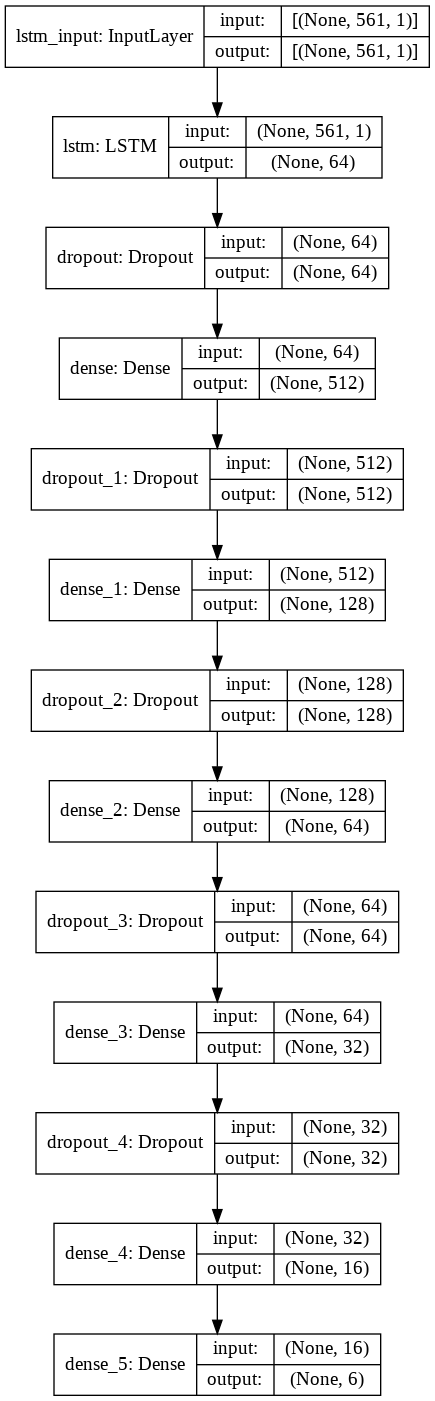

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=1024,validation_data=(X_test, y_test),epochs=30)

Epoch 1/30
8/8 [==============================] - 29s 4s/step - loss: 0.3626 - accuracy: 0.8534 - val_loss: 0.4251 - val_accuracy: 0.8388
Epoch 2/30
8/8 [==============================] - 29s 4s/step - loss: 0.2906 - accuracy: 0.8893 - val_loss: 0.4437 - val_accuracy: 0.8347
Epoch 3/30
8/8 [==============================] - 29s 4s/step - loss: 0.2850 - accuracy: 0.8897 - val_loss: 0.4140 - val_accuracy: 0.8507
Epoch 4/30
8/8 [==============================] - 30s 4s/step - loss: 0.2778 - accuracy: 0.8906 - val_loss: 0.4185 - val_accuracy: 0.8470
Epoch 5/30
8/8 [==============================] - 29s 4s/step - loss: 0.2699 - accuracy: 0.8961 - val_loss: 0.4250 - val_accuracy: 0.8456
Epoch 6/30
8/8 [==============================] - 28s 4s/step - loss: 0.2668 - accuracy: 0.8983 - val_loss: 0.4144 - val_accuracy: 0.8517
Epoch 7/30
8/8 [==============================] - 28s 4s/step - loss: 0.2711 - accuracy: 0.8945 - val_loss: 0.4097 - val_accuracy: 0.8541
Epoch 8/30
8/8 [==================

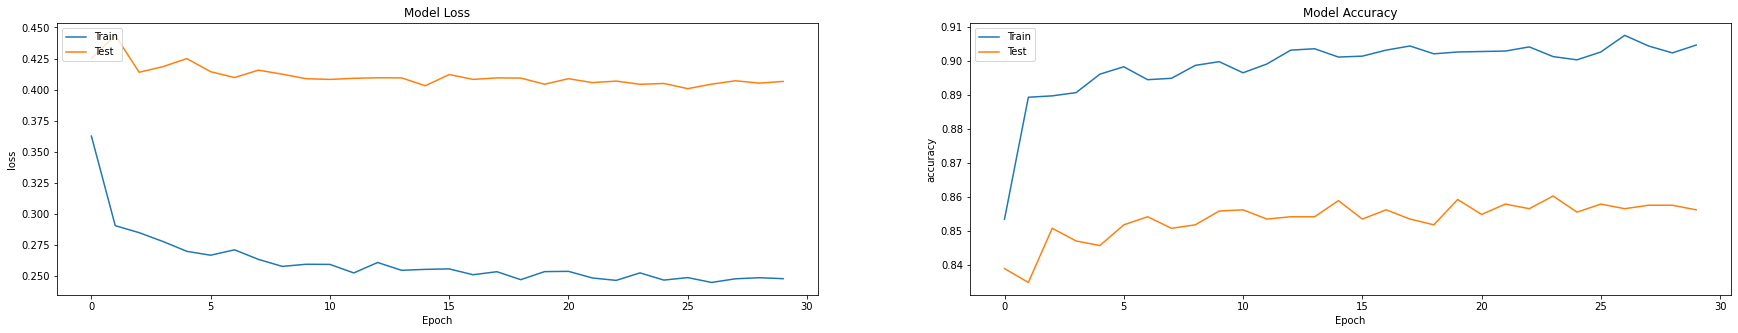

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
y_test_=np.argmax(y_test, axis=-1)
y_pred_=np.argmax(y_pred, axis=-1)
print('Valid Accuracy:-',accuracy_score(y_test_,y_pred_))

Valid Accuracy:- 0.8561248727519511


In [ ]:
import matplotlib.pyplot as plt
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
def plot_confusion_matrix(cm,classes=labels,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

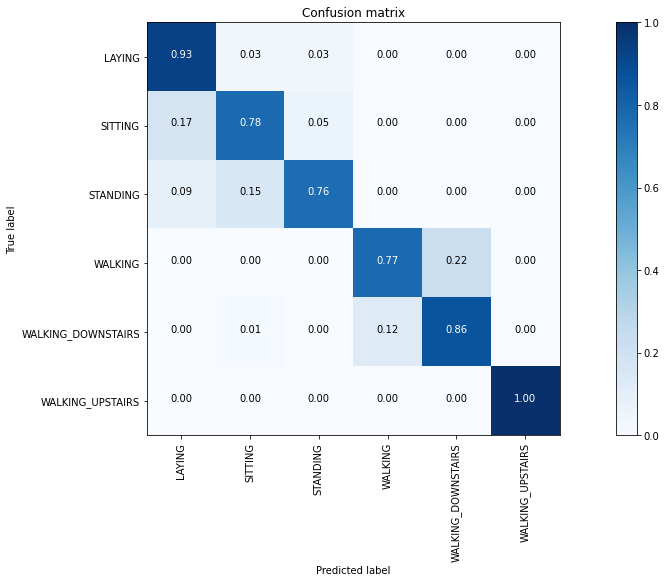

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test_, y_pred_)
plot_confusion_matrix(cm,labels)

# LSTM Layers

In [30]:
def LSTM_layer(n_hidden,timesteps,input_dim):
  model=Sequential()
  model.add(LSTM(128,return_sequences=True,input_shape=(timesteps,input_dim)))
  model.add(LSTM(64,return_sequences=True,input_shape=(timesteps,input_dim)))
  model.add(LSTM(32,return_sequences=True,input_shape=(timesteps,input_dim)))
  model.add(LSTM(16,return_sequences=True,input_shape=(timesteps,input_dim)))
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Dropout(0.3))
  model.add(Dense(128))
  model.add(Dropout(0.2))
  model.add(Dense(64))
  model.add(Dropout(0.15))
  model.add(Dense(32))
  model.add(Dropout(0.1))
  model.add(Dense(16))
  model.add(Dense(6,activation='softmax'))
  return model

In [31]:
model=LSTM_layer(n_hidden,timesteps,input_dim)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 561, 128)          66560     
_________________________________________________________________
lstm_6 (LSTM)                (None, 561, 64)           49408     
_________________________________________________________________
lstm_7 (LSTM)                (None, 561, 32)           12416     
_________________________________________________________________
lstm_8 (LSTM)                (None, 561, 16)           3136      
_________________________________________________________________
flatten_1 (Flatten)          (None, 8976)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8976)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)              

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history=model.fit(X_train,y_train,batch_size=1024,validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
8/8 [==============================] - 3s 336ms/step - loss: 0.1264 - accuracy: 0.9464 - val_loss: 0.2476 - val_accuracy: 0.9243
Epoch 2/200
8/8 [==============================] - 3s 325ms/step - loss: 0.1350 - accuracy: 0.9452 - val_loss: 0.2525 - val_accuracy: 0.9179
Epoch 3/200
8/8 [==============================] - 3s 326ms/step - loss: 0.1267 - accuracy: 0.9493 - val_loss: 0.2776 - val_accuracy: 0.9125
Epoch 4/200
8/8 [==============================] - 3s 326ms/step - loss: 0.1349 - accuracy: 0.9449 - val_loss: 0.2246 - val_accuracy: 0.9308
Epoch 5/200
8/8 [==============================] - 3s 328ms/step - loss: 0.1232 - accuracy: 0.9484 - val_loss: 0.2011 - val_accuracy: 0.9348
Epoch 6/200
8/8 [==============================] - 3s 326ms/step - loss: 0.1251 - accuracy: 0.9484 - val_loss: 0.2551 - val_accuracy: 0.9186
Epoch 7/200
8/8 [==============================] - 3s 327ms/step - loss: 0.1418 - accuracy: 0.9408 - val_loss: 0.2403 - val_accuracy: 0.9199
Epoch 8/200
8

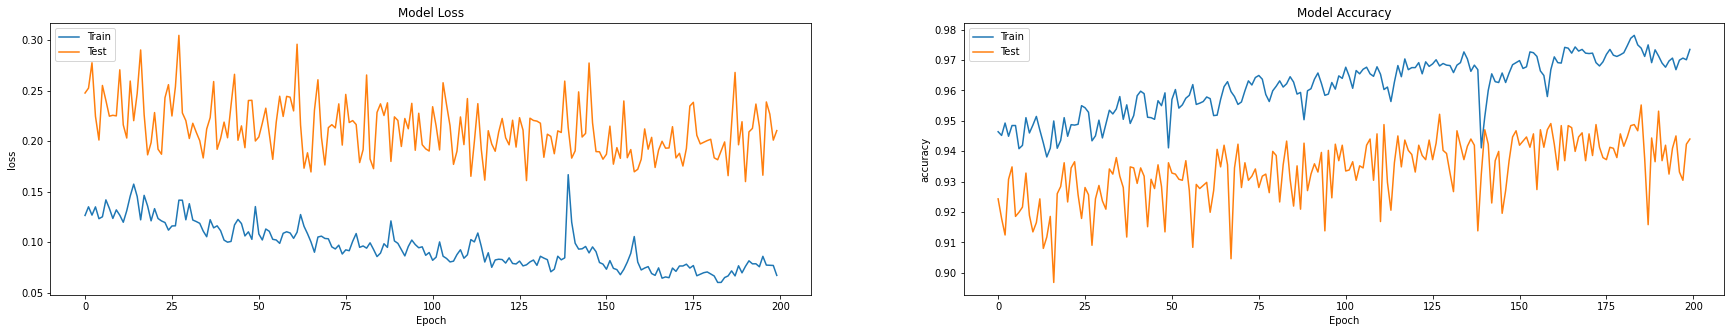

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
y_test_=np.argmax(y_test, axis=-1)
y_pred_=np.argmax(y_pred, axis=-1)
print('Valid Accuracy:-',accuracy_score(y_test_,y_pred_))

Valid Accuracy:- 0.9440108585001696


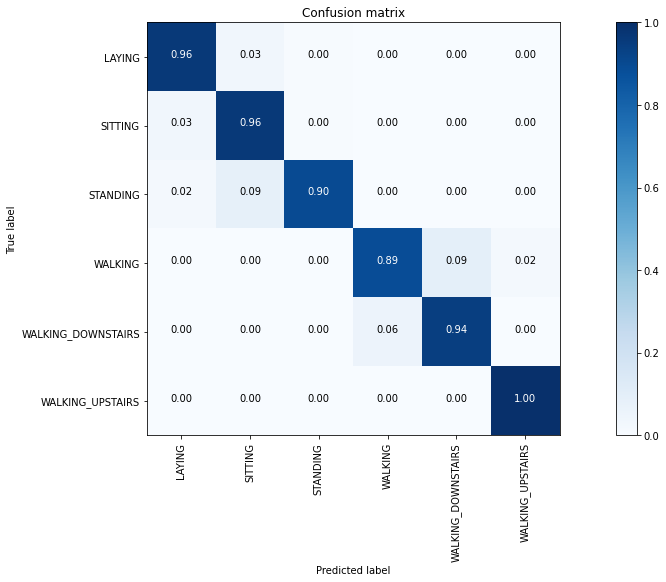

In [37]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test_, y_pred_)
plot_confusion_matrix(cm,labels)

# CONV-1D Layer

In [16]:
from tensorflow.keras.layers import MaxPooling1D
def Conv1D_layer(n_hidden,timesteps,input_dim):
  model=Sequential()
  model.add(Conv1D(128,8,1, activation = 'relu', input_shape=(561,1)))
  model.add(MaxPooling1D(pool_size=4,))
  model.add(Conv1D(64,8,1, activation = 'relu', input_shape=(561,1)))
  model.add(MaxPooling1D(pool_size=2,))
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Dropout(0.3))
  model.add(Dense(128))
  model.add(Dropout(0.2))
  model.add(Dense(64))
  model.add(Dropout(0.15))
  model.add(Dense(32))
  model.add(Dropout(0.1))
  model.add(Dense(16))
  model.add(Dense(6,activation='softmax'))
  return model

In [17]:
model=Conv1D_layer(n_hidden,timesteps,input_dim)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 554, 128)          1152      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 138, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 131, 64)           65600     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 65, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 4160)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4160)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

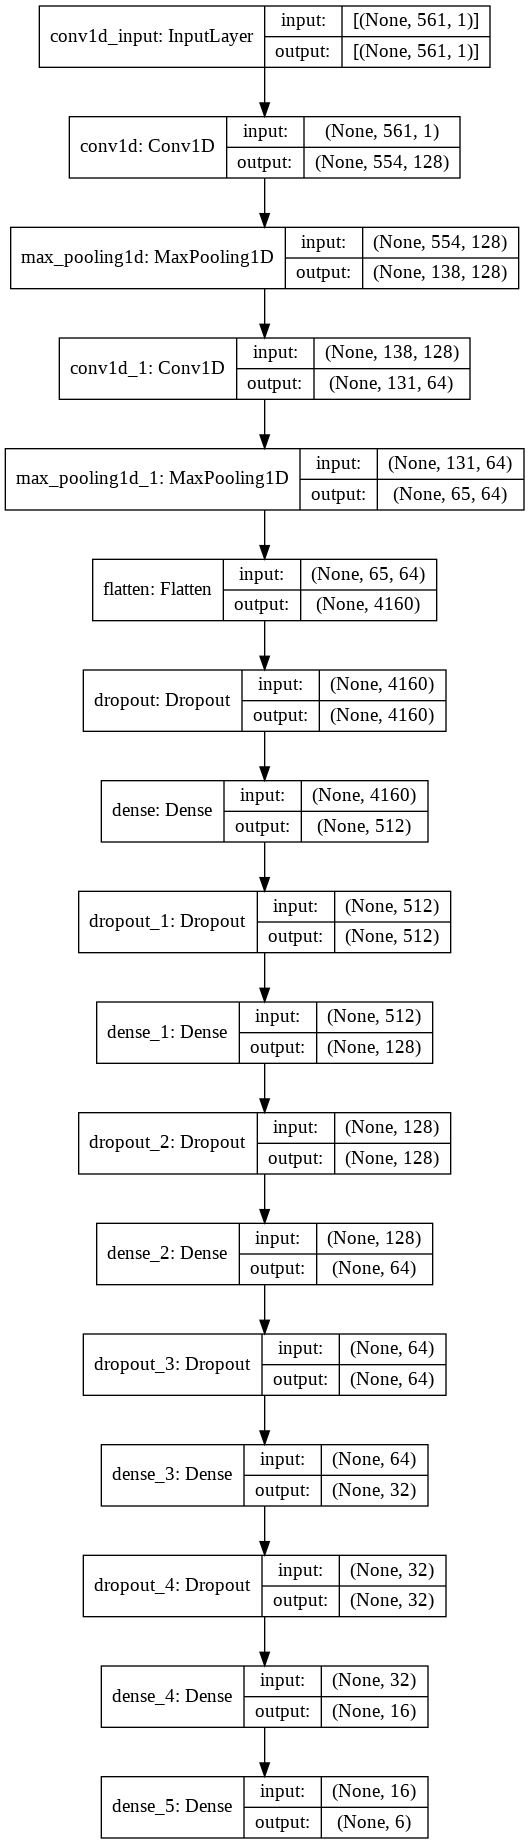

In [18]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history=model.fit(X_train,y_train,batch_size=1024,validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
8/8 [==============================] - 3s 92ms/step - loss: 2.1863 - accuracy: 0.2719 - val_loss: 1.4343 - val_accuracy: 0.3546
Epoch 2/200
8/8 [==============================] - 0s 42ms/step - loss: 1.2734 - accuracy: 0.4135 - val_loss: 0.9181 - val_accuracy: 0.7438
Epoch 3/200
8/8 [==============================] - 0s 42ms/step - loss: 1.0077 - accuracy: 0.5426 - val_loss: 0.7791 - val_accuracy: 0.7845
Epoch 4/200
8/8 [==============================] - 0s 43ms/step - loss: 0.7738 - accuracy: 0.6825 - val_loss: 0.5445 - val_accuracy: 0.7974
Epoch 5/200
8/8 [==============================] - 0s 42ms/step - loss: 0.5701 - accuracy: 0.7659 - val_loss: 0.3818 - val_accuracy: 0.8660
Epoch 6/200
8/8 [==============================] - 0s 42ms/step - loss: 0.4517 - accuracy: 0.8101 - val_loss: 0.3727 - val_accuracy: 0.8405
Epoch 7/200
8/8 [==============================] - 0s 44ms/step - loss: 0.3879 - accuracy: 0.8380 - val_loss: 0.3152 - val_accuracy: 0.8772
Epoch 8/200
8/8 [===

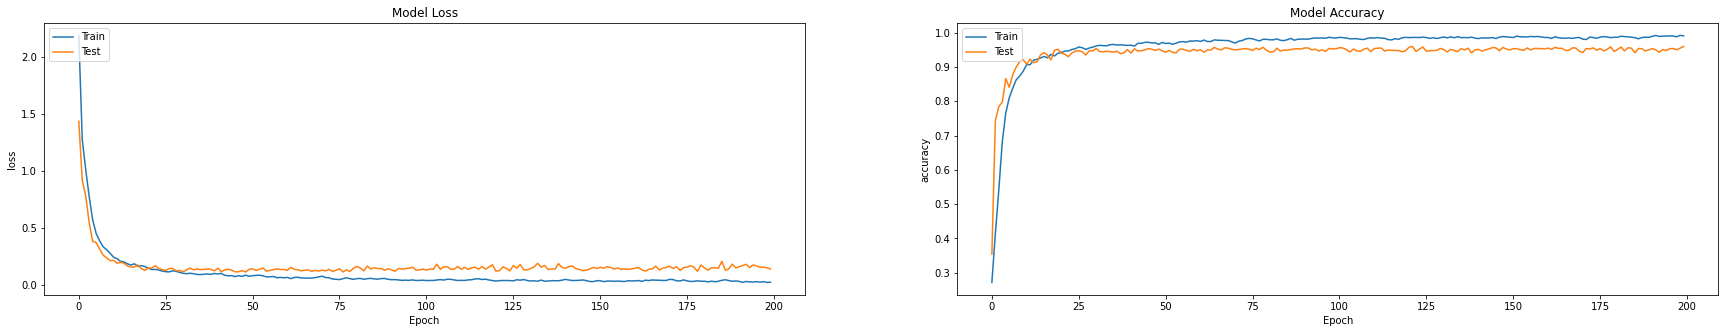

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation f1_score
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
y_test_=np.argmax(y_test, axis=-1)
y_pred_=np.argmax(y_pred, axis=-1)
print('Valid Accuracy:-',accuracy_score(y_test_,y_pred_))

Valid Accuracy:- 0.9596199524940617


In [23]:
import matplotlib.pyplot as plt
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
def plot_confusion_matrix(cm,classes=labels,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

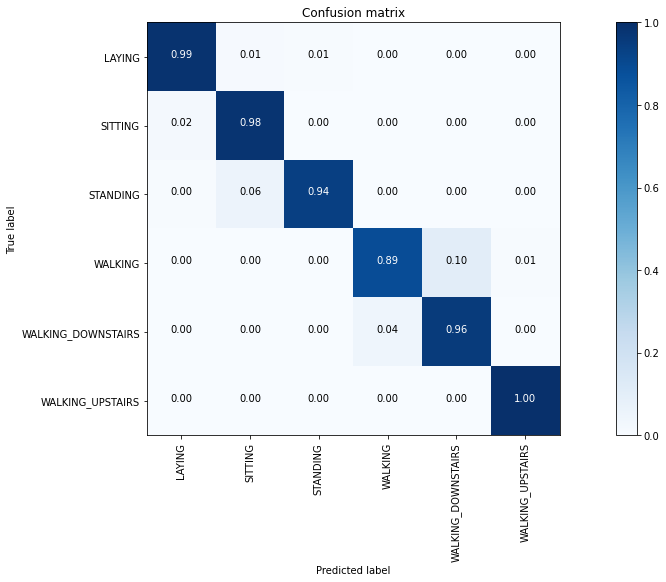

In [24]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test_, y_pred_)
plot_confusion_matrix(cm,labels)